# Midterm Notebook

Welcome to your midterm. Logistics:
- Open book/open note/**no internet**
- You are not allowed to discuss the exam with each other
- All questions about the exam will come to me, through email. Do not send any public messages to me, or each other about the exam.
- If there are any clarifications required, I will post them on brightspace and update this document.

A note on the **kinds** of answers I expect: As is our style on HW and in class, many of these questions are open ended and are **not** asking you to repeat what you've read or heard in class. On the contrary, if I read my own words (or a texts) I will mark that down! I expect you to demonstrate your original thoughts. Almost none of these questions require 3-word answers (some do though, those should be clear by the question!). Having said that, I also don't want you to start just typing out vocabulary words that we've used in class. 



<br/>
<div class='alert alert-danger'>

<font size='5'>🤔</font> **Tip**: If you feel you can't answer a question, **skip it and come back**. Sometimes reading the entire thing will help clarify the individual parts. If all else fails, I will award partial credit for effort, and a clear explanation of what you're confused about and why. 

</div>

<br/>
<div class='alert alert-danger'>

<font size='5'>🤔</font> **Tip**: If you're really confused, **try and thoroughly explain your confusion!**

</div>

    

## Changelog

If there are any updates/errors, I will update this section and email the class.
<br/>
<div class='alert alert-info'>

<font size='5'>👾</font> **Note:** 
* This is **version 2**, updated on 2022-10-10 at 6pm for use on Colab
 * Colab uses an old version of python (from 2019!) and an old version of `sklearn` so I had to update the last problem 
* ~This is **version 1**, updated on 2022-10-10 at 9:00am.~

</div>

## Notebook Setup

In [936]:
# imports
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns
import pandas as pd

# 3d figures
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# creating animations
import matplotlib.animation
from IPython.display import HTML

# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

# Problem 0

Lets do a simple exercise using `numpy`! 

## 0.A
Write some code to specify an array representing a point in "the **unit-cube** in 3-D space. That is, give me a single **random** point whose $(x,y,z)$ values are each between (0,1).

In [937]:
a_point = np.random.random_sample(3)
a_point

array([0.08644973, 0.18177138, 0.59290022])

## 0.B
Now, give me a single array with `1000` many points in the unit cube:

In [938]:
random_points = np.random.random_sample((1000,3))
random_points.shape

(1000, 3)

## 0.C
Give me the **minimum**, **maximum** and **mean** of **each column**, to verify that we've done this correctly:

In [939]:
min_vals=np.min(random_points, axis =0)
max_vals=np.max(random_points, axis =0)
mean_vals=np.mean(random_points, axis =0)

min_vals, max_vals, mean_vals

(array([0.00101354, 0.00044989, 0.00068134]),
 array([0.99817499, 0.99994275, 0.99971509]),
 array([0.49962307, 0.48301588, 0.49550206]))

## 0.D
<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  According to the above, where is the **center** of this cube? Does this make sense? Why or why not? Comment below!

</div>

---

The mean_vals would be the direct center of the unit cube because out of the 1000 sampled values along the unit cube, it is the average value meaning it would be the closest to the center possible. It makes sense that the center would round to something close to [.5,.5.,5] since that would be the center of each of the unit axis ranges of (0,1) combined. 

---

## 0.E
Great! Now lets **shift** the entire cube of points, so that its **new center**, is $(2,1,4)$

In [940]:
x = random_points[:,0]*4
y = random_points[:,1]*2
z = random_points[:,2]*8
shifted_points = np.vstack((x,y,z))
shifted_points=np.transpose(shifted_points)

## 0.F
As we did above, lets verify that the new center of this cube is in the correct place!

In [941]:
shifted_mean_vals = np.mean(shifted_points, axis =0)
shifted_mean_vals

array([1.99849228, 0.96603176, 3.96401648])

## 0.G
And finally, **how far on average**, according to the *usual* distance measure (which we fancily called the $\mathcal{L}_2$-norm) is the original single point, from the new shifted cube?

<br/>
<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint** I'm asking you to calculate the $\mathcal{L}_2$ norm between the original point, and **each point in the shifted cube**, and then average all those distances together.

</div>

In [942]:
#Used the dot product to get the L2 norms of the distance on each dimension 
dist0=np.dot(x, a_point[0])
dist1=np.dot(y,a_point[1])
dist2=np.dot(z,a_point[2])
#combine each dimension 
dist_points = np.vstack((x,y,z))
dist_points=np.transpose(dist_points)
#average over all points
np.mean(dist_points)

2.309513505833452

## 0.H
<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Does this make sense given how you shifted the points in the first place? Think about it!

</div>

---

Since I shifted the points by multiplying each column by one factor, it makes sense that the center would be an average distance away from the unit center that is a value in between the factors that were multiplied. Since the dot product is the same as the L2 norm, I used the dot product to find each axis of differences in the values and combined the axises to see the total amount of difference at the end. Since the random points were within the new unit cube and the original point was in a unit cube, it makes sense that there would be a measureable distance between them and that the distance would reflect the shift the unit cube went through which would increase the distance measure. 

---
# Problem 1

For this problem, we're going to use the `penguins` dataset built into `seaborn`.

In [981]:
penguins_df = sns.load_dataset("penguins").dropna()

Note, this gives you a dataframe as:

In [944]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 1.A

As we did in the "Exploratory Data Analysis" discussion, draw a "scatter plot matrix" of this dataset's 4 numeric features:
- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

and colored by their `species`.

<br/>
<div class='info'>
    
<font size='5'>👇🏽</font> **Note:** This is the figure I want you to generate

</div>

![](penguins_df.png)

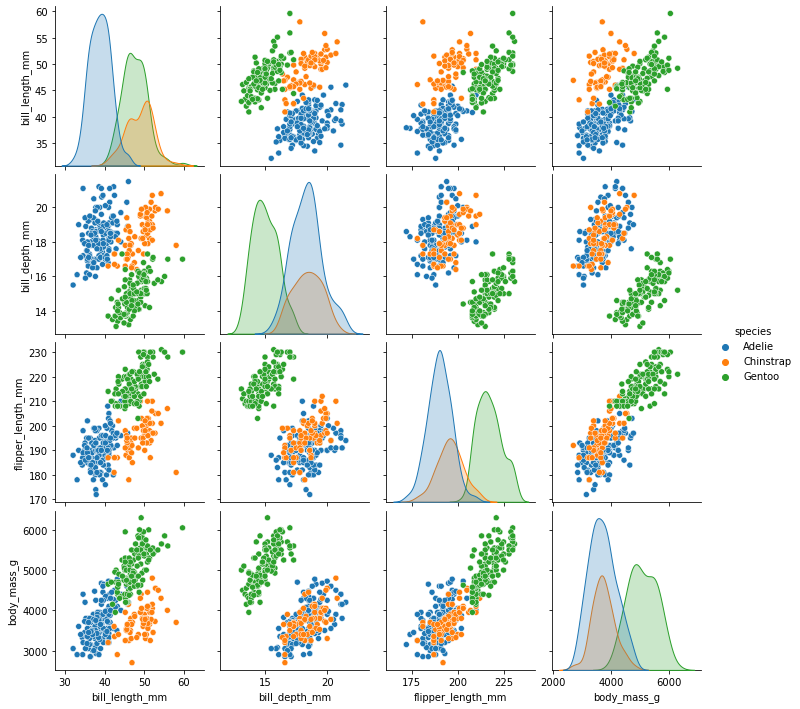

In [945]:
sns.pairplot(penguins_df, vars=penguins_df.columns[2:6], hue='species',corner=False);

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Question:** Explain what we are looking at in this figure. Explain to me its diagonal, and its off diagonal elements. Why is this kind of graphic helpful? Give a thorough explanation here!

</div>

---

This graph shows all the correlation plots possible for the four numerical factors in the penguin dataset. So in order to read it on the off diagonal plots, you look at each plot to see the relationship between two numeric factors on either axis and the color within the plot shows how the relationship is distributed for each species. The diagonal plots show density plots for each individual variable, which essentially shows how the spread of often each measure occurs for each species to compare their ranges, means, and max values. This kind of paired plot helps visualize all the potential predictors of species at once and determine which would be the best to use for logistic regression based on the plots with the least amount of overlap. If there is a visual distinction between the three species groups signified in the plots, this signals the strong potential for a better seperation in classification later down the line in the linear regression model. Whereas if there is a large amount of overlap in the plots here, showing lots of overlap in species preit will be harder for the logistic regression to make a classifiction about the threshold of species predictors in the training dataset. 

---

<div class='info'>
    
<font size='5'>🤔</font> **Question:** Based on the figure and your explanation, if I wanted to tell apart the **Adelie** from the **Chinstrap** penguis, **which two features would be the best?** Why? Give a good explanation here! 

</div>

---

This would require picking the features in which the Adelie and Chinstrap penguins have the biggest amount of visual distinction on the plots, which looks like bill_length_mm and bill_width_mm. The plots for bill_depth compared to body mass or flipper length have a large amount of overlap between Adelie and Chinstrap, so these would be bad predictors since the two species seem to perform similarly and would be difficult to distinguish between. The same can be said for the plot between flipper length and body mass. All the plots for bill length have a better distinction between the two species, so it is simply a matter of choosing which overlaps the least and for this it seems to be bill_width_mm.

Orignally I started making my regressions with bill length and body mass as my two features, but after completing the Knearest neighbors charts for different features and seeing how high the accuracy of the model was when using bill length and bill depth together, I changed my feature selection strategy because ability to have accuracy within the KNN model was a good signifer that the predicttors could lead to more accuracy in the regressions I ran as well.

---

## 1.B

Now that you've picked these two features, perform a **linear regression** and use it to try and classify these two penguins apart. 

**Make sure you report the weight values you've learned!**

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Hint:**  This is very similar to what we did on HW1!

</div>

In [946]:
#First I will slice up the original dataset to give us only the `Adelie` and `Chinstrap` penguins, and as features,\
#`bill_length_mm` and `bill_depth`

In [982]:
#Checking the count of each species 
penguins_df.groupby(['species'])['species'].count()

species
Adelie       146
Chinstrap     68
Gentoo       119
Name: species, dtype: int64

In [983]:
#I made two seperate dataframes for the adelie and the chinstrap penguin
adelie=penguins_df[penguins_df['species'] == 'Adelie']
chinstrap=penguins_df[penguins_df['species'] == 'Chinstrap']
adelie.shape, chinstrap.shape

((146, 7), (68, 7))

In [984]:
#Then I Combined the two dataframes to make a new penguins df without gentoos
frames=[adelie,chinstrap]
penguinsAC_df = pd.concat(frames)
penguinsAC_df.shape

(214, 7)

In [952]:
#I renamed the column name from species to dummy so it would combine with the penguins df more easily
speciesdummy= penguinsAC_df[['species']]
speciesdummy=speciesdummy.rename(columns={"species": "dummy"})
speciesdummy

,dummy
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
215,Chinstrap
216,Chinstrap
217,Chinstrap
218,Chinstrap


In [953]:
#Replacing the species with -1 and 1 as a dummy variable
speciesdummy=speciesdummy.replace({'Adelie': 1, 'Chinstrap': -1})
speciesdummy

,dummy
0,1
1,1
2,1
4,1
5,1
...,...
215,-1
216,-1
217,-1
218,-1


In [954]:
#Checking the shape
penguinsAC_df.shape,speciesdummy.shape

((214, 7), (214, 1))

In [955]:
#Merging the two dataframes with each other to add on my new dummy variables for species
frames2=[penguinsAC_df,speciesdummy]
penguinsAC_df = pd.concat(frames2, axis=1)

In [956]:
#Checking to see the sucessful merge
penguinsAC_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,dummy
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1
...,...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,-1
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female,-1
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male,-1
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male,-1


In [957]:
#Making y the dummy variables so 1= Adelie and -1= Chinstrap
y=penguinsAC_df.dummy.to_numpy()
y.shape,X.shape

((214,), (214, 3))

In [958]:
#Checking the count of each species 
penguinsAC_df.groupby(['dummy'])['dummy'].count()

dummy
-1     68
 1    146
Name: dummy, dtype: int64

In [986]:
#Then I spliced to make x the two factor columns and y the species column 
X = penguinsAC_df.iloc[:214,[2,3]].to_numpy()
X.shape
#y.shape

(214, 2)

In [987]:
#I made a column of ones to attatch to X
ones_col_vec = np.ones(214)
ones_col_vec=ones_col_vec.reshape(214,1)
ones_col_vec.shape

(214, 1)

In [988]:
#And added it to X
X = np.concatenate((ones_col_vec, X), axis=1)
X.shape

(214, 3)

In [989]:
#Checking the first few rows to make sure it looks okay
X[:5]

array([[ 1. , 39.1, 18.7],
       [ 1. , 39.5, 17.4],
       [ 1. , 40.3, 18. ],
       [ 1. , 36.7, 19.3],
       [ 1. , 39.3, 20.6]])

In [991]:
#Make our weight vector for our regression
w_lin = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w_lin

array([ 3.6900905 , -0.15487513,  0.17309622])

In [992]:
#For better readability
adelie_X = X[y==1,:]
chinstrap_X = X[y==-1,:]

## 1.C

Show a figure, plotting the datapoints with your regression line.

In [993]:
#Repeating the same weight vectors 
w_lin = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w_lin

array([ 3.6900905 , -0.15487513,  0.17309622])

In [994]:
#Defining the slope and intercept of the regression line
slope_lin = -(w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = -w_lin[0]/w_lin[2]
intercept_lin, slope_lin

(-21.318145481219076, 0.894734310730835)

In [995]:
#Setting the boundaries for my graph
px = np.linspace(30,60,20)
py = np.linspace(15,25,20)
pX,pY = np.meshgrid(px,py)
pZ = w_lin[0] + pX*w_lin[1] + pY*w_lin[2]

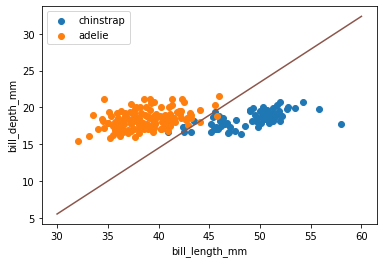

In [996]:
#Plot of my regression output 
plt.figure()
plt.scatter(X[y==-1,1],X[y==-1,2],label='chinstrap');
plt.scatter(X[y==1,1],X[y==1,2],label='adelie');
plt.plot(px, px*slope_lin + intercept_lin, color=colors[5])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm');
plt.legend();

## 1.D

Perform a **logistic regression** and use it to try and classify these two penguins apart. **Make sure you report the value's you've learned!**

<br/>
<div class='info'>
    
<font size='5'>☝🏽</font> **Hint:** Remember, these are available under the `.coef_` and `.intercept_` names for logistic regression in `sklearn`

</div>

In [997]:
from sklearn.linear_model import LogisticRegression
penguins_df = sns.load_dataset("penguins").dropna()

In [998]:
#splitting my datasets into the two types of penguins
adelie=penguins_df[penguins_df['species'] == 'Adelie']
chinstrap=penguins_df[penguins_df['species'] == 'Chinstrap']

In [999]:
#selecting just the two factors for each df
adelie_X = adelie.iloc[:147,[2,3]].values
chinstrap_X = chinstrap.iloc[:147,[2,3]].values

In [1000]:
#Making a class column
penguinsAC_df=pd.concat([penguinsAC_df,pd.get_dummies(penguinsAC_df["species"])], axis=1); penguinsAC_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0
...,...,...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,0,1
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female,0,1
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male,0,1
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male,0,1


In [1001]:
penguinsAC_df.shape

(214, 9)

In [1002]:
#Making my x & y value of species
X = penguinsAC_df.iloc[:214,[2,3]].values
y = penguinsAC_df['Adelie'].values
X.shape, y.shape

((214, 2), (214,))

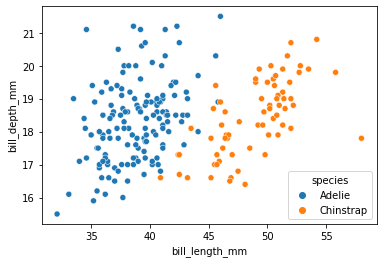

In [1003]:
#Looking at the 2D plot of the relationship
import plotly.express as px
sns.scatterplot(data=penguinsAC_df,x='bill_length_mm',y='bill_depth_mm',hue='species');

In [1004]:
#Looking at the 3D plot of the relationship
fig = px.scatter_3d(penguinsAC_df,
                    x='bill_length_mm',
                    y='bill_depth_mm',
                    z='Adelie',
                    color='species')
fig.update_traces(marker={'size': 4})

In [1005]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X,y) 

LogisticRegression(penalty='none')

In [1006]:
#Printing the regression coefficients
log_reg.coef_, log_reg.intercept_

(array([[-2.20057491,  3.97805587]]), array([24.09029087]))

In [1007]:
w2 = log_reg.coef_[:,1]
w1 = log_reg.coef_[:,0]
w0 = log_reg.intercept_

In [1008]:
#Defining the sig curve relationship
def sig_curve(XY):
    return np.squeeze(1 / (1 + np.exp(-1 * (w0 +(w1 * XY[:,0])+ (w2 *XY[:,1])))))

In [1009]:
# setup the boundaries for my plot
X_pl = np.linspace(30,60,20)
y_pl = np.linspace(15,25,20)
X_pl,Y_pl = np.meshgrid(x_pl,y_pl)
XY_pl = np.vstack((X_pl.ravel(),Y_pl.ravel())).T
Z = sig_curve(XY_pl).reshape(20,20)

### Bonus

Show a 2D figure, plotting the datapoints with your logistic regression line.

In [1010]:
Z.shape

(20, 20)

ValueError: x and y must have same first dimension, but have shapes (400, 2) and (20, 20)

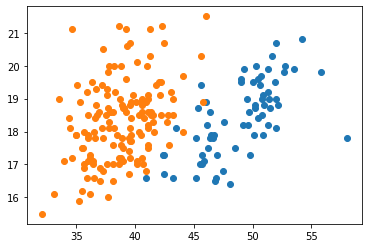

In [1011]:
#2D relationship of the logistic regression 
plt.figure()
plt.scatter(X[y==0,0],X[y==0,1],label='chinstrap');
plt.scatter(X[y==1,0],X[y==1,1],label='adelie');
#Changed the line to the logistic regression coefficients and intercept 
#but XY is in the wrong shape and unclear how to fix it
plt.plot(XY_pl,w2*y_pl+ w1*X_pl + w0, color=colors[4])
plt.xlabel('bill length')
plt.ylabel('bill width');
plt.legend();
#This was my attempt at making a 2D plot but the code is from the linear regression example so I worked on 
#Changing the plt.plot information to fit the logistic regression but could not figure out how to get the right line 

In [1022]:
# 3d plot of the logistic regression
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=Z,
                                 x=X_pl,
                                 y=y_pl,
                                 opacity=0.2,
                                 colorscale='Turbo',
                                 showscale=False),
                      go.Scatter3d(z=sig_curve(chinstrap_X),
                                   x=chinstrap_X[:,0],
                                   y=chinstrap_X[:,1],
                                   mode='markers',
                                   marker=dict(
                                       size=4,
                                       color=colors[0],
                                       opacity=0.8),
                                   name='chinstrap'
                                  ),
                      go.Scatter3d(z=sig_curve(adelie_X),
                                   x=adelie_X[:,0],
                                   y=adelie_X[:,1],
                                   mode='markers',
                                   marker=dict(
                                       size=4,
                                       color=colors[1],
                                       opacity=0.8),  
                                   name='adelie'
                      )])
fig.update_coloraxes(showscale=False)
fig.update_layout(autosize=False,
                  width=500,
                  height=500,
                  scene = dict(
                    xaxis_title='bill_length_mm',
                    yaxis_title='bill_width_mm'),
                    margin=dict(l=0, r=0, b=0, t=0)
                 )

## 1.E

Calculate the error in both the linear regression and logistic regression models. Which performs better?

In [1015]:
#Redefine linear X so it doesn't get confused with logistic regression X
#Then I spliced to make x the two factor columns and y the species column 
X = penguinsAC_df.iloc[:214,[2,3]].to_numpy()
X.shape
#y.shape

#I made a column of ones to attatch to X
ones_col_vec = np.ones(214)
ones_col_vec=ones_col_vec.reshape(214,1)
ones_col_vec.shape

#And added it to X
X = np.concatenate((ones_col_vec, X), axis=1)
X.shape

#Checking the first few rows to make sure it looks okay
X[:5]

array([[ 1. , 39.1, 18.7],
       [ 1. , 39.5, 17.4],
       [ 1. , 40.3, 18. ],
       [ 1. , 36.7, 19.3],
       [ 1. , 39.3, 20.6]])

In [1016]:
#linear regression error
#creating a function to calculate MSE
def myMSE(a,b):
    totale= np.sum(np.square(np.subtract(a,b)))
    N = a.shape[0]
    return totale*(1/N)

#finding the predicted values of y
y_hat = X.dot(w_lin)

#finding MSE between real values of y and predicted values of y
myMSE(y_hat,y)

0.3177570093457794

In [1018]:
#Logistic regression error
#Setting the t
chinstrap_hat = sig_curve(chinstrap_X)
errorc=sum(i >.5 for i in chinstrap_hat)

In [1019]:
adelie_hat = sig_curve(adelie_X)
errora=sum(i <.5 for i in adelie_hat)
errora

3

In [1020]:
#sum of total errors divided by total number of predictions 
np.sum([errora,errorc])/214

0.028037383177570093

In [1021]:
adelie_X.shape, chinstrap_X.shape

((146, 2), (68, 2))

While accounting for the two seperate measures of error, since the logistic regression cannot use MSE as a means of measuring error, the logistic regression does seem to be a better predictor of species, since the calculated error of .028 is lower than the MSE of .05. Since we are using both as a classifier problem, they can be compared to evaluate which of the two performs better as a classifier, but there is not an equivalent to the MSE for logistic regression like there is for linear regression, so I instead calculated the classification loss.

## 1.F 

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  Wait a minute. How did we use linear regression and logistic regression for **classification**? Explain why these are called regression models, and how we used them for classification!

</div>

---

In linear regression, the two relationship of the two features is used to generate regression coefficients that determine a threshold line in 3D space, in which any values that cross the predicted regression threshold will be classified as that kind of species. In this case, crossing the regression threshold would mean being predicted to be an adelie, while staying under would mean being predicted to be a chinstrap.

In logistic regression, the coefficients of the weight vector gives a sig curve function that predicts a probability or Z value of being a certain species classification. Then if the probability is over the determined threshold, in this case .5, that would predict an adelie, and if it is under the threshold it would be predicted to be a chinstrap. 

Both are called regression models because they require regressing two variables against each other to find the predicted relationships and the classification comes from these outputs, which are either linear or discrete, depending on the type of regression used. 

---

# Problem 2

For this problem, we are going to do a basic **exploration** of a KNN, along the lines of how we did it in class.

I will give you the code to create/train one. I just want you to think conceptually like we did in class about KNNs.

To make this part simpler, I will assume above you already generated a dataframe containing only **Adelie** and  **Chinstrap** penguins. 

Copy/paste it below:

In [450]:
penguins_df = penguinsAC_df
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


Now, we can define a list of **feature names** we are interested in looking at:

In [451]:
feature_names = ['bill_length_mm', 'bill_depth_mm']

Now, we can use that to **select those features** from of our dataframe along with labels:

In [452]:
X = penguins_df[feature_names].values
y = penguins_df['species'].replace({'Adelie':0,'Chinstrap':1}).values

<br/>
<div class='info'>

<font size='5'>🤩</font> Now we're ready to train a KNN!

</div>

In [453]:
from sklearn.neighbors import KNeighborsClassifier

Lets set the very important `n_neighbors` parameter. For right now, lets jsut set it to `10` and we will experiment with it later:

In [454]:
n_neighbors = 10

Lets fit it!

In [455]:
knn_model = KNeighborsClassifier(n_neighbors)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

Lets see how we did by calculating our **accuracy** on our entire dataset:

In [456]:
print(f'Accuracy: {knn_model.score(X, y)*100:.2f}%')

Accuracy: 95.79%


Hm. This seems pretty good, but lets visualize it!

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:** This is where I updated this NB to version 2 to account for an old Colab version.

</div>

In [457]:
# decision boundary plotting function
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, X, y, scale=1):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h=0.5
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h*scale))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    cmap = sns.palettes.color_palette('muted',as_cmap=True)
    cmap_light = ListedColormap(cmap[:2])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light,alpha=0.5);
    # Plot also the training points
    ax = sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        alpha=1.0,
        edgecolor="black",
        palette='muted'
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'KNN: K={n_neighbors} and Accuracy: {model.score(X, y)*100:.2f}%');
    plt.xlabel(feature_names[0]);
    plt.ylabel(feature_names[1]);
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Adelie','Chinsrap'])

Now we can call it:

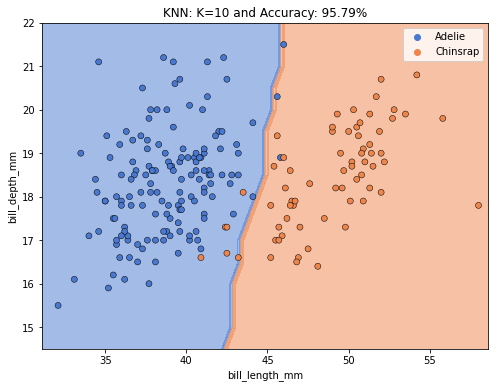

In [458]:
plot_decision_boundary(knn_model,X,y)

Now lets use it on two new features:

* `flipper_length_mm`
* `body_mass_g`

In [486]:
feature_names = ['flipper_length_mm', 'body_mass_g']
X, y = penguins_df[feature_names].values, y
n_neighbors = 10

knn_model = KNeighborsClassifier(n_neighbors)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

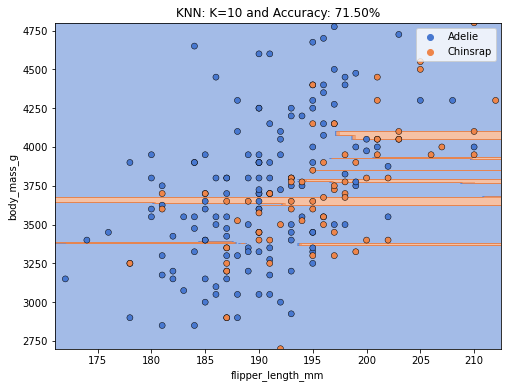

In [487]:
plot_decision_boundary(knn_model,X,y)

## 2.A

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  What are we looking at here? Is this good or bad? Why do you think so? Give a **thorough** explanation here! 
    
**Hint:** Pay attention to the *scale* of our axes! 

</div>

---


The second plot shows how the knearnest neighbors is less successful when the two species are much more integrated and have a lot more overlap in the plot. This makes it harder for the nearest neighbors to make any meaningful distinction between the adelie and chinstrip values since they perform relatively similarly. This is shown in the accuracy of the plot decreasing from 95.79% to 71.50% whcih shows that the KNeighborsClassifier can only correctly predict the class of a new value given the body mass and flipper length 71% of the time. This is not a strong predictor since a 50% predictor relationship is no better than guessing 50-50 on every prediction, so we want as high of a value above 50% as possible. Using bill length and bill depth clearly had a better predicting power since the adelie and the chinstrap penguins occupy very different areas on the graph and have a clear distinction in their distribution of values. 

In addition, the scales of the axis show how knearest neighbors is performing poorly because if you look at the paired plot that showed the different correlation of values in the earlier section, it showed the most relevant ranges of values for flipper length and body mass, and body mass was graphed up into the 6000 g range, but this plot is only showing values up to the 4750 range. The plot itself seems to cut off some of the values, which may be a fault of the display axis chosen, but it further goes to show a weakness of the second plot that the first plot does not suffer from. 

This was a 10 k nearest neighbors problem which means that each point was evaluated against every other point in the dataset and their differences were ranked and whatever the majority of their ten closest neighbors identified as, that was the region that point on the graph was classified as, until suffiicent neighborhoods began to emerge. 

---

## 2.B

Now, go back, and repeat this experiment with different groups of features and different values for **K**/`n_neighbors`. Report the pair of features used, the `K` used, and what you observed for the accuracy:

|Features Used|K|Accuracy|
|-------------|---|---------|
|['bill_depth_mm', 'body_mass_g']|10|70.09|
|['bill_depth_mm', 'body_mass_g']|5|74.77|
|['bill_depth_mm', 'bill_length_mm']|5|98.13|
|['bill_depth_mm', 'bill_length_mm']|2|97.66|
|['bill_depth_mm', 'flipper_length_mm']|25|74.3|
|['bill_depth_mm', 'flipper_length_mm']|5|75.7|



## 2.C

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Does this match what you thought would happen from the exploratory section above? Why or why not? Comment below!

</div>

---


Yes this matches the exploratory section because this both demonstrated how the features selected can make a difference if the relationship between the two shows a larger amount of distinction between the two species, which woudl increase the accuracy of the knearest neighbors. LIke how the bill depth versus bill length had a much higher accuracy than the bill depth versus flipper length, whcih had a much lower accuracy even when the same K was used. 

However, K does have an impact because this showed that as the K decreases, the accuracy goes up when the same features are used. This makes sense in reference to what we discussed in class that since this is not mapping the nearest neighbors to a testing dataset and is simply fitting the dataset by comparing the distance of each point to one point to make neighborhoods of similar values. The smaller the neighborhoods get to be, the more accurate they will be because they can more closely match the data to itself. This does not guarantee a 100% accuracy since there can still be some uncertainty in the dataset itself from overlapping values. But in the features that are really good predictors, the smaller the K, the closer to 100% accuracy they become. With bill depth and flipper length, even with K=1 the accuracy only went to 92.99% which shows the limits of certain sets of features. But with bill depth and bill length, when K=1, the model reaches 100% accuracy which shows the impact of K on accuracy if the features are a good fit.

---

# Bonus Problems

Below are 2 bonus problems. You may attempt both, but **only serious attempts will be graded!** If you attempt them do so seriously! Short/simple answers will not receive any points!

## Bonus - 1

For this problem, implement a simple gradient descent loop to solve the same **linear regression** that you solved above!

<br/>
<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint:**  In class, we gave the **gradient** for Linear-Regression! Just use it as you normally would in gradient descent! 

</div>

In [930]:
#Making f_prime the function for finding the weight vectors 
def f_prime(X,y):
    return (np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
#unclear of how to make a weight vector formaula with only one variable which seems to be needed for gradient descent

In [931]:
initialGuess = .1
# step-size/learning-rate
eta = .1

# delta value (difference of new weight and old)
# that I want to stop at:
delta_stop = 0.001

# setup path holding variables
wPath = [initialGuess]
fPath = [f(initialGuess)]

TypeError: 'NoneType' object is not callable

In [932]:
# setup initial weights
w_t = 0
w_y = 0 #Adding another weight for y but now I don't know where to put this in the formula
#Would that need a second gradient descent?
w_t_new = initialGuess

In [933]:
# trying to include both the variables needed for the weight vectors 
delta_w = w_t_new - w_t+w_y
#From what I saw of linear regression gradient descent, it needed a more complicated while loop like a 
#locally weighted linear regression but I did not know how to implement that into code

In [935]:
#Using the same while loop but unclear how to include two variables
while abs(delta_w) > delta_stop:
    
    # set last iterations "new" weights as our current weights
    w_t = w_t_new
    
    # update weights using the gradient
    w_t_new = w_t - eta * f_prime(w_t,w_y) #the f_prime isn't working if the weights start at zero bc it needs an array 
    #to transpose in the linalg formula so I don't know how you would iterate over that 
    
    # store the weights for plotting
    wPath.append(w_t_new)
    fPath.append(f(w_t_new))
    
    # recalculate delta_w
    delta_w = w_t_new-w_t

# convert back from list to array for plotting
wPath = np.asarray(wPath)
fPath = np.asarray(fPath)

# print start and end points
endPoint = np.round((wPath[-1],wPath[-1]),2)
print("Staring at:{}, GD ended at:{} with {} steps".format(initialGuess, endPoint,fPath.shape[0]))

#Final values needed to plot
slope_lin = -(w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = -w_lin[0]/w_lin[2]

AttributeError: 'float' object has no attribute 'T'

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Compare your answer to the one above. Should they match? Why or why not? Comment below!

</div>

---

The gradient descent is iterating over each potential regression line until it hits a local minimum of the best solution possible for this set of data, so hypothetically this would end up being the same answer to the part one solution of just calcualating it. But this could depend on the starting point and stepping value because if it started in the wrong direction or took too big of learning jumps, it could potentially descend too far in the opposite direction and miss the optimim values from part one. But for the most part these should be the same.  

---
## Bonus - 2

How does the material we've learned so far relate to any other material you've seen before? Any similarities? Differences? 

If this is your first exposure to the material, then how does this relate to what you thought it was going to be before taking the class? How about what you wanted to use ML for in the future?


- Note: I'm **not** asking about style, difficulty, or coverage in the class!
- This question is **not a request for feedback**! 

It's asking you to reconcile the material we've learned in class with the other material you've learned so far in other classes/your career, or what you thought it was going to be! I'm looking for things like: 

 - "In class A we learned about the Bias-Variance trade-off like this, which is different than how we learned about it here. They are different in this way, they are similar in this way. I'm having a hard time seeing how they are talking about the same thing because ... etc.
 - I haven't had any previous exposure to these topics before. I didn't realize what a big deal it was to select an appropriate hypothesis space and algorithm, etc. 
 - I always heard deep learning just works. But how come they don't overfit all the time? etc.
 - I'm confused about how exactly Linear regression can ever do better than KNNs, since KNNs use distance to .... etc.
 - In my lab project we always use ___ method, but that doesn't seem to fit with what we are learning about, etc.
 
I want you to think deeply about this question. This exercise causes you to re-evaluate what you know, in terms of what you're learning and vice-versa, often changing your interpretation of both! 

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note: This bonus is "open ended", and I will award points based on the depth of your answer.**

</div>

---

Since I am a Data Science minor, I have taken the DS 1000 and DS 3100 class that are both introductions to the fundamentals of data science taught in R. As a result, we have looked at a very similar syllabus of linear regression and logistic regression, ans since I am taking Fundamentals concurrently, even on the same timeline as this class. 

The last homework assignment we turned in was a linear regression on a dataset of our choosing and I did a regression to predict housing price given number of bedrooms, land value, and other variables of construction. The process of a DS linear regression assignment focused much more specifically on running tests of significance such as looking at the correlations of the dataset, much like we did in the paired plots here, but we spend more of the assignment's focus on seeing if there were any suppression effects from overfitting the model or from multicollinearity. I ran shapiro tests and graphed the fitted values against the residuals as well as a Q2 plot to see if the residuals are equally distributed along the regression line or if it performs poorly at the ends, which signals the weakness of the model. All of these are more concerned with the evaluation stage of regression than the actual learning stage of building intuition about what regression is really calculating and what the line represents which has been more of the focus of our class time so far. 

I also took Applied Econometrics which was entirely focused on different models of constructing regressions and the specifics rules they must satisfy in order to have the results be fully interpretable. This deals with biased estimators, multicollinearity again, sampling errors, and the minimum number of time and factors samples necessary to qualify for difference in difference models to truly make ab impact estimate of beta1. To me this signals the difference of this class focused on the learning stage and the econometrics focus on interpretation of the results. 

I am also taking a Poverty and Discrimination class that uses published papers’ regression tables to practice interpreting results to prove existing theories on discrimination. This is a different goal also since it is more situated in understanding academic understanding of real life phenemoma, whereas one of the goals of machine learning is to find relationships in the data that might have gone unnoticed by human eyes and academic theories. In more formal research that is being done to create a new economic theory, there might be an incentive to look for variable relationships that make sense with preexisting understandings of human behavior but with linear regression and especially the knnearest neighbors human behavior might be grouped in unexpected ways that could even be indecipherable to us making the interpretation stage much more difficult. 

This far in our discussion of regressions we have focused less on this evaluation or interpretation of results in their context, like the ability to drop variables that are less relevant from the model or address multicollinearity within the variables. Part of this has to do with our focus on linear or logistic regression for classification, which we talked about getting complicated if it uses more than two variables. Since the number of variables we are starting with is much smaller, we get to spend much less time thinking about the implications of each one and how useful of a predictor it is compared to my other classes where it is common for the regression to include five or more indicators. 

This makes sense since the point of machine learning is to build algorithms that can operate on larger scales and learn about huge amounts of information, so any attempt to be overly specific about what is included might come at a detriment to our model. To me, this intersection of policy and data evaluation that I am more formally focused on in my professional interests and the functions machine learning is capable of was one of the most exciting parts of this class that I am interested in learning more about.

I read the book "Weapons of Math Destruction" this semester and learned more about the real life applications of algorithms and models that are used today to predict everything from prison sentencing to predicted credit score so as to increase efficiency in all aspects of human life. Reading it made me somewhat hesitant about this intersection I discussed because of the indecipherable nature of certain machine learning models like I described, but I am hopeful that with enough background in these other subjects that focus on interpretation and evaluation, along with the more formal understanding of machine learning modeling and how it works that I am getting from this class, I can be the most effective and ethical programmer possible!

---